In [1]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Use the dataframe and create a sqlite db

connection = sqlite3.connect('../2023_SqliteDV.db')

query = "SELECT * FROM plays"

df = pd.read_sql_query(query, connection)

In [3]:
connection.close()

In [4]:
play_types = df.groupby(by="Play Type")

In [5]:
play_types.size()

Play Type
Blocked Punt                        2
End Period                         43
End of Game                        21
End of Half                        19
End of Regulation                   2
Field Goal Good                    37
Field Goal Missed                  15
Fumble Recovery (Opponent)         13
Fumble Recovery (Own)              17
Fumble Return Touchdown             2
Interception                       23
Interception Return Touchdown       1
Kickoff                           178
Kickoff Return (Offense)           23
Pass Incompletion                 399
Pass Interception Return            8
Pass Reception                    728
Passing Touchdown                  70
Penalty                           192
Punt                              149
Rush                             1117
Rushing Touchdown                  58
Sack                               69
Timeout                           121
dtype: int64

In [6]:
## Start some analysis

# Get Oregon offensive plays

oregon_offense = df[df['Offense'] == 'Oregon']
print(len(oregon_offense))

# List of play types to include in rushing dataframe
rushing_types = ['Rush', 'Rushing Touchdown', 'Sack', 'Fumble Recovery (Opponent)']

# Filter the DataFrame to include only Rush play types
rush_df = oregon_offense[oregon_offense['Play Type'].isin(rushing_types)]
print(len(rush_df))

1142
403


In [7]:
# pass_df.head()

In [8]:
# Filter the DataFrame to include only rows with 'Thomas Fidone' in the play text column
bucky_df = rush_df[rush_df['Play Text'].str.contains('Bucky Irving')]

In [9]:
rush_total_yards = bucky_df['Yards Gained'].sum()

In [10]:
print(rush_total_yards)

1072


In [11]:
# johnson_df.head()

In [12]:
bucky_df_sorted = bucky_df.sort_values(by='Wallclock')
bucky_df_sorted_reset = bucky_df_sorted.reset_index(drop=True)

In [13]:
# Calculating the average 'Yards Gained' for Thomas
average_yards = bucky_df_sorted_reset['Yards Gained'].mean()
std_dev_yards = bucky_df_sorted_reset['Yards Gained'].std()

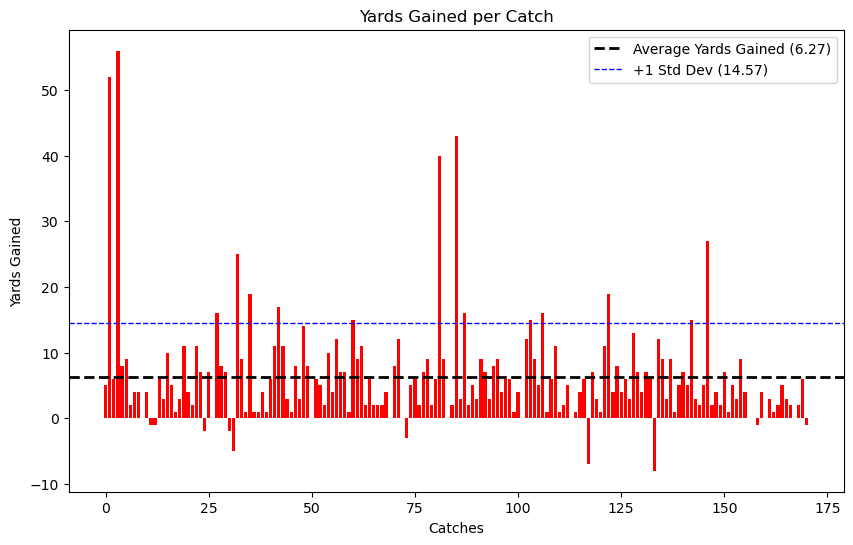

In [14]:
# Creating a bar chart using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(bucky_df_sorted_reset.index, bucky_df_sorted_reset['Yards Gained'], color='red')

# Adding a horizontal line for the average
plt.axhline(average_yards, color='black', linestyle='--', linewidth=2, label=f'Average Yards Gained ({average_yards:.2f})')

# Adding horizontal lines for the standard deviation
plt.axhline(average_yards + std_dev_yards, color='blue', linestyle='--', linewidth=1, label=f'+1 Std Dev ({average_yards + std_dev_yards:.2f})')

plt.title('Yards Gained per Catch')
plt.xlabel('Catches')
plt.ylabel('Yards Gained')
plt.legend()
plt.show()